<a href="https://colab.research.google.com/github/paris3169/ZM-study-practice/blob/main/time_series_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random
import time

In [2]:
import pandas as pd

let's create a fake price historical data series

In [3]:
mu=100
std=5

In [4]:
prices=np.random.normal(mu,std,size=1000)

In [5]:
prices.size

1000

In [6]:
prices[:10]

array([ 97.83512277,  98.39341507,  95.4524797 , 102.56068244,
       103.81679599, 104.67056787,  96.85586413, 106.10615057,
        94.33028949,  99.29168561])

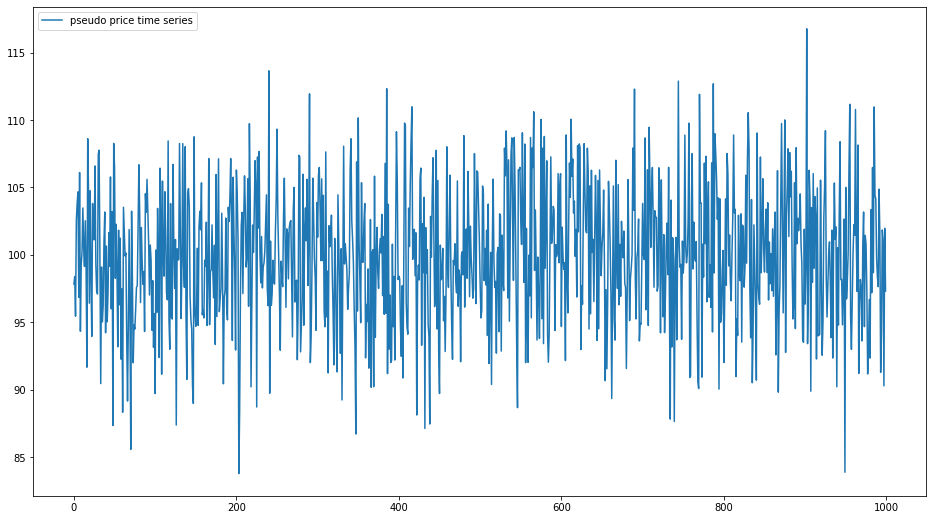

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.plot(prices,label="pseudo price time series")
plt.legend()

Now I want to create lagged prices seried with a window (mav number of lags) and also an horizon (number of pseudo future prices that are used as labels for training)
Let's start creating **lagged price series** from the original one

**Alt1** Let's use pandas to generated a windowed 2D array of prices

In [10]:
indexes=np.arange(0,len(prices))

In [11]:
df=pd.DataFrame(prices,columns=["price"],index=indexes)

In [12]:
df.info(),df["price"].mean(),df["price"].std()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   1000 non-null   float64
dtypes: float64(1)
memory usage: 15.6 KB


(None, 99.87791147071401, 5.11884345353108)

In [13]:
WINDOW=6
HORIZON=1

In [14]:
df.dropna(inplace=True)

In [15]:
windowed_prices=df.values

In [17]:
df

,price
0,97.835123
1,98.393415
2,95.452480
3,102.560682
4,103.816796
...,...
995,101.842454
996,101.108980
997,90.280108
998,101.968993


now let's functionalize these lines of codes

In [18]:
def calculate_price_window(price_series,window,horizon):

  df=pd.DataFrame(price_series,columns=["price"])
  window_size=window+horizon
  for i in range(1,window_size):
    col="lag"+str(int(i))
    df[col]=df.price.shift(i)
  df.dropna(inplace=True) 
  window_prices=df.iloc[:,horizon:].values
  horizon_prices=df.iloc[:,:horizon].values
  return np.round(window_prices,3),np.round(horizon_prices,3),df

In [19]:
start=time.time()
past_prices,label_prices,df=calculate_price_window(prices,5,1)
delta=time.time()-start
print(f"{delta} in seconds")

0.012881994247436523 in seconds


In [21]:
past_prices[:10],label_prices[:10]

(array([[103.817, 102.561,  95.452,  98.393,  97.835],
        [104.671, 103.817, 102.561,  95.452,  98.393],
        [ 96.856, 104.671, 103.817, 102.561,  95.452],
        [106.106,  96.856, 104.671, 103.817, 102.561],
        [ 94.33 , 106.106,  96.856, 104.671, 103.817],
        [ 99.292,  94.33 , 106.106,  96.856, 104.671],
        [100.206,  99.292,  94.33 , 106.106,  96.856],
        [103.475, 100.206,  99.292,  94.33 , 106.106],
        [100.628, 103.475, 100.206,  99.292,  94.33 ],
        [ 99.141, 100.628, 103.475, 100.206,  99.292]]), array([[104.671],
        [ 96.856],
        [106.106],
        [ 94.33 ],
        [ 99.292],
        [100.206],
        [103.475],
        [100.628],
        [ 99.141],
        [102.525]]))

In [22]:
df

,price,lag1,lag2,lag3,lag4,lag5
5,104.670568,103.816796,102.560682,95.452480,98.393415,97.835123
6,96.855864,104.670568,103.816796,102.560682,95.452480,98.393415
7,106.106151,96.855864,104.670568,103.816796,102.560682,95.452480
8,94.330289,106.106151,96.855864,104.670568,103.816796,102.560682
9,99.291686,94.330289,106.106151,96.855864,104.670568,103.816796
...,...,...,...,...,...,...
995,101.842454,94.149066,91.280761,101.499164,104.875405,97.636336
996,101.108980,101.842454,94.149066,91.280761,101.499164,104.875405
997,90.280108,101.108980,101.842454,94.149066,91.280761,101.499164
998,101.968993,90.280108,101.108980,101.842454,94.149066,91.280761


In [23]:
past_prices.shape,label_prices.shape

((995, 5), (995, 1))

In [24]:
for i in range(5):
  print(f"{past_prices[i]},==> {label_prices[i]}")

[103.817 102.561  95.452  98.393  97.835],==> [104.671]
[104.671 103.817 102.561  95.452  98.393],==> [96.856]
[ 96.856 104.671 103.817 102.561  95.452],==> [106.106]
[106.106  96.856 104.671 103.817 102.561],==> [94.33]
[ 94.33  106.106  96.856 104.671 103.817],==> [99.292]


**function to do the splitting of time series**


In [25]:
past_prices.shape

(995, 5)

In [26]:
def train_test_split(X,y,test_split):

  split=int(len(X)*(1-test_split))
  X_train=X[:split]
  X_test=X[split:]
  y_train=y[:split]
  y_test=y[split:]
  return X_train,X_test,y_train,y_test

In [27]:
X_train,X_test,y_train,y_test=train_test_split(past_prices,label_prices,0.2)

In [28]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((796, 5), (199, 5), (796, 1), (199, 1))

In [23]:
past_prices.shape,label_prices.shape

((995, 5), (995, 1))

In [29]:
X_train[:10],y_train[:10]

(array([[103.817, 102.561,  95.452,  98.393,  97.835],
        [104.671, 103.817, 102.561,  95.452,  98.393],
        [ 96.856, 104.671, 103.817, 102.561,  95.452],
        [106.106,  96.856, 104.671, 103.817, 102.561],
        [ 94.33 , 106.106,  96.856, 104.671, 103.817],
        [ 99.292,  94.33 , 106.106,  96.856, 104.671],
        [100.206,  99.292,  94.33 , 106.106,  96.856],
        [103.475, 100.206,  99.292,  94.33 , 106.106],
        [100.628, 103.475, 100.206,  99.292,  94.33 ],
        [ 99.141, 100.628, 103.475, 100.206,  99.292]]), array([[104.671],
        [ 96.856],
        [106.106],
        [ 94.33 ],
        [ 99.292],
        [100.206],
        [103.475],
        [100.628],
        [ 99.141],
        [102.525]]))

In tensorflow there is an utility to gerenate windowed series from a series. In this case is not useful as the windowas are not lagged in time

In [31]:
import tensorflow as tf

In [32]:
input_data = prices[1:]  #1: identify the sequence position from where the X data (train data) will start. 
targets = prices[0:]  #this is identifying the sequence position of targets (label). in such case the first position of the window sequence is the target
mydataset=tf.keras.utils.timeseries_dataset_from_array(input_data,targets,sequence_length=5,batch_size=10,sequence_stride=1)

In [33]:
for batch,target in mydataset.take(2):
  print(np.round(batch,2),np.round(target,2))

[[ 98.39  95.45 102.56 103.82 104.67]
 [ 95.45 102.56 103.82 104.67  96.86]
 [102.56 103.82 104.67  96.86 106.11]
 [103.82 104.67  96.86 106.11  94.33]
 [104.67  96.86 106.11  94.33  99.29]
 [ 96.86 106.11  94.33  99.29 100.21]
 [106.11  94.33  99.29 100.21 103.48]
 [ 94.33  99.29 100.21 103.48 100.63]
 [ 99.29 100.21 103.48 100.63  99.14]
 [100.21 103.48 100.63  99.14 102.53]] [ 97.84  98.39  95.45 102.56 103.82 104.67  96.86 106.11  94.33  99.29]
[[103.48 100.63  99.14 102.53  98.96]
 [100.63  99.14 102.53  98.96  91.67]
 [ 99.14 102.53  98.96  91.67 108.62]
 [102.53  98.96  91.67 108.62 104.66]
 [ 98.96  91.67 108.62 104.66  96.41]
 [ 91.67 108.62 104.66  96.41 104.75]
 [108.62 104.66  96.41 104.75  98.48]
 [104.66  96.41 104.75  98.48  93.95]
 [ 96.41 104.75  98.48  93.95 103.81]
 [104.75  98.48  93.95 103.81 101.14]] [100.21 103.48 100.63  99.14 102.53  98.96  91.67 108.62 104.66  96.41]


**Alt2** there is an alternative way to generate lagged window time series using just numpy whihc seems also to be faster than using pandas

Let's play frost with a small example and then show the function

In [37]:
series=np.arange(10,dtype=np.int16)
series

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int16)

In [38]:
#remember the module division
5 % 2

1

In [39]:
lag=2
m=len(series)
last=m-(lag+m) % m
m,last

(10, 8)

In [40]:
lag_series=np.array([np.nan for i in range(m)])
lag_series

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [41]:
lag_series[lag:]=series[:last]
lag_series

array([nan, nan,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.])

In [45]:
def make_lagged_series(series,lag):

  m=len(series)   
  last_index=m-(lag+m) % m  #this is the last index of original series after the lag
  lag_series=np.array([np.nan for i in range(m)])
  lag_series[lag:]=series[:last_index]-  #the lag to m position of lagged series correspond to the original series items up to last (excluded)
  return lag_series


In [46]:
#let's make another example with prices
series=np.round(prices[:10],2)
series

array([ 97.84,  98.39,  95.45, 102.56, 103.82, 104.67,  96.86, 106.11,
        94.33,  99.29])

In [50]:
lag_series=make_lagged_series(series,2)
lag_series,lag_series.shape

(array([   nan,    nan,  97.84,  98.39,  95.45, 102.56, 103.82, 104.67,
         96.86, 106.11]), (10,))

In [51]:
def make_window(series,max_lag):
  window=[series]
  for i in range(1,max_lag+1):
    lagi=make_lagged_series(series,i)
    window.append(lagi)
  return np.array(window)
  

In [52]:
series

array([ 97.84,  98.39,  95.45, 102.56, 103.82, 104.67,  96.86, 106.11,
        94.33,  99.29])

In [53]:
window=make_window(series,5)

In [54]:
window.shape

(6, 10)

In [55]:
window

array([[ 97.84,  98.39,  95.45, 102.56, 103.82, 104.67,  96.86, 106.11,
         94.33,  99.29],
       [   nan,  97.84,  98.39,  95.45, 102.56, 103.82, 104.67,  96.86,
        106.11,  94.33],
       [   nan,    nan,  97.84,  98.39,  95.45, 102.56, 103.82, 104.67,
         96.86, 106.11],
       [   nan,    nan,    nan,  97.84,  98.39,  95.45, 102.56, 103.82,
        104.67,  96.86],
       [   nan,    nan,    nan,    nan,  97.84,  98.39,  95.45, 102.56,
        103.82, 104.67],
       [   nan,    nan,    nan,    nan,    nan,  97.84,  98.39,  95.45,
        102.56, 103.82]])

In [56]:
pd.DataFrame(window.T,columns=["lag"+str(i) for i in range(window.shape[0])])

,lag0,lag1,lag2,lag3,lag4,lag5
0,97.84,NaN,NaN,NaN,NaN,NaN
1,98.39,97.84,NaN,NaN,NaN,NaN
2,95.45,98.39,97.84,NaN,NaN,NaN
3,102.56,95.45,98.39,97.84,NaN,NaN
4,103.82,102.56,95.45,98.39,97.84,NaN
5,104.67,103.82,102.56,95.45,98.39,97.84
6,96.86,104.67,103.82,102.56,95.45,98.39
7,106.11,96.86,104.67,103.82,102.56,95.45
8,94.33,106.11,96.86,104.67,103.82,102.56
9,99.29,94.33,106.11,96.86,104.67,103.82


In [57]:
#let's test this
prices.size,prices.shape

(1000, (1000,))

In [61]:
start=time.time()
windowed_series=make_window(prices,5)
time.time()-start

0.0023686885833740234

In [62]:
windowed_series.shape

(6, 1000)

In [63]:
windowed_series

array([[ 97.83512277,  98.39341507,  95.4524797 , ...,  90.28010824,
        101.96899336,  97.31834479],
       [         nan,  97.83512277,  98.39341507, ..., 101.10898026,
         90.28010824, 101.96899336],
       [         nan,          nan,  97.83512277, ..., 101.84245436,
        101.10898026,  90.28010824],
       [         nan,          nan,          nan, ...,  94.14906644,
        101.84245436, 101.10898026],
       [         nan,          nan,          nan, ...,  91.28076128,
         94.14906644, 101.84245436],
       [         nan,          nan,          nan, ..., 101.49916372,
         91.28076128,  94.14906644]])

In [64]:
df=pd.DataFrame(windowed_series.T,columns=["lag"+str(i) for i in range(windowed_series.shape[0])]).dropna()

In [65]:
df

,lag0,lag1,lag2,lag3,lag4,lag5
5,104.670568,103.816796,102.560682,95.452480,98.393415,97.835123
6,96.855864,104.670568,103.816796,102.560682,95.452480,98.393415
7,106.106151,96.855864,104.670568,103.816796,102.560682,95.452480
8,94.330289,106.106151,96.855864,104.670568,103.816796,102.560682
9,99.291686,94.330289,106.106151,96.855864,104.670568,103.816796
...,...,...,...,...,...,...
995,101.842454,94.149066,91.280761,101.499164,104.875405,97.636336
996,101.108980,101.842454,94.149066,91.280761,101.499164,104.875405
997,90.280108,101.108980,101.842454,94.149066,91.280761,101.499164
998,101.968993,90.280108,101.108980,101.842454,94.149066,91.280761


Now we can functionize these lines of code and also make even better (autoremoval of the NAN)

In [66]:
def make_windowed_series(series,max_lag):
  window=[series]
  for i in range(1,max_lag+1):
    lagi=make_lagged_series(series,i)
    window.append(lagi)
  return np.array(window).T[max_lag:]
  

In [104]:
start=time.time()
window=make_windowed_series(prices,6)
time.time()-start

0.001976490020751953

In [107]:
df=pd.DataFrame(window)
df.head()

,0,1,2,3,4,5,6
0,96.855864,104.670568,103.816796,102.560682,95.452480,98.393415,97.835123
1,106.106151,96.855864,104.670568,103.816796,102.560682,95.452480,98.393415
2,94.330289,106.106151,96.855864,104.670568,103.816796,102.560682,95.452480
3,99.291686,94.330289,106.106151,96.855864,104.670568,103.816796,102.560682
4,100.205868,99.291686,94.330289,106.106151,96.855864,104.670568,103.816796


now let's transform this in tensor

In [69]:
import tensorflow as tf

In [70]:
np.zeros(shape=(10,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [72]:
tensor=tf.constant([1,2,3])
tensor

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

In [74]:
len(window) // 128

7

In [77]:
window[0:(1*128)].shape

(128, 7)

In [128]:
#this function is calculating the lagged windowed series using pandas
def make_window_with_pandas(price_series,window):

  df=pd.DataFrame(price_series,columns=["price"])
  for i in range(1,window):
    col="lag"+str(int(i))
    df[col]=df.price.shift(i)
  df.dropna(inplace=True)
  windowed_series=df.values
  return np.round(windowed_series,3)

In [154]:
window=make_window_with_pandas(prices,12)
window

array([[103.475, 100.206,  99.292, ...,  95.452,  98.393,  97.835],
       [100.628, 103.475, 100.206, ..., 102.561,  95.452,  98.393],
       [ 99.141, 100.628, 103.475, ..., 103.817, 102.561,  95.452],
       ...,
       [ 90.28 , 101.109, 101.842, ...,  99.743, 104.185, 104.36 ],
       [101.969,  90.28 , 101.109, ...,  98.352,  99.743, 104.185],
       [ 97.318, 101.969,  90.28 , ...,  97.636,  98.352,  99.743]])

In [169]:
def generate_batches(series,past_window,horizon=1,batch_size=128):
  """
    this is taking a time series,. make a windowed versio of it and return two tensors
    tf_windows of shape (batch_number,batch_size,window_size)
    tf_labels of shape (batch_number,batch_size,horizon)
  """
  #windowed_series=make_windowed_series(series,past_window+horizon-1)  #this is to use the numpy function to make the windowed_lagged time series
  windowed_series=make_window_with_pandas(series,past_window+horizon)  #this is to sue the pandas based fucntion to make the windowed_lagged time series
  batch_number=len(window) // batch_size
  tensor=[]  #this is the full tensor that will be splitted in the final 2
  for i in range(batch_number):
    batchi=windowed_series[(i*batch_size):((i+1)*batch_size)]
    print(batchi.shape)
    tensor.append(batchi)
  tensor=tf.constant(tensor)
  print(tensor.shape)
  tf_X=tensor[:,:,horizon:]
  tf_y=tensor[:,:,:horizon]
  return tf_X,tf_y
  

In [170]:
start=time.time()
X,y=generate_batches(prices,10,2)
print(time.time()-start," seconds")

(128, 12)
(128, 12)
(128, 12)
(128, 12)
(128, 12)
(128, 12)
(128, 12)
(7, 128, 12)
0.023506641387939453  seconds


with pandas fucntion time is 0.02443408966064453  seconds while with numpy the time needed is higher i.e. is 0.03643155097961426  seconds

In [171]:
X.shape,y.shape

(TensorShape([7, 128, 10]), TensorShape([7, 128, 2]))

In [172]:
#to verify that is exactly like expected
for i in range(5):
  print(f"batch: 0, training_window: {X[0,i,:]} ==> label: {y[0,i,:]}")

batch: 0, training_window: [ 99.292  94.33  106.106  96.856 104.671 103.817 102.561  95.452  98.393
  97.835] ==> label: [103.475 100.206]
batch: 0, training_window: [100.206  99.292  94.33  106.106  96.856 104.671 103.817 102.561  95.452
  98.393] ==> label: [100.628 103.475]
batch: 0, training_window: [103.475 100.206  99.292  94.33  106.106  96.856 104.671 103.817 102.561
  95.452] ==> label: [ 99.141 100.628]
batch: 0, training_window: [100.628 103.475 100.206  99.292  94.33  106.106  96.856 104.671 103.817
 102.561] ==> label: [102.525  99.141]
batch: 0, training_window: [ 99.141 100.628 103.475 100.206  99.292  94.33  106.106  96.856 104.671
 103.817] ==> label: [ 98.96  102.525]


In [173]:
pd.DataFrame(window)

,0,1,2,3,4,5,6,7,8,9,10,11
0,103.475,100.206,99.292,94.330,106.106,96.856,104.671,103.817,102.561,95.452,98.393,97.835
1,100.628,103.475,100.206,99.292,94.330,106.106,96.856,104.671,103.817,102.561,95.452,98.393
2,99.141,100.628,103.475,100.206,99.292,94.330,106.106,96.856,104.671,103.817,102.561,95.452
3,102.525,99.141,100.628,103.475,100.206,99.292,94.330,106.106,96.856,104.671,103.817,102.561
4,98.960,102.525,99.141,100.628,103.475,100.206,99.292,94.330,106.106,96.856,104.671,103.817
...,...,...,...,...,...,...,...,...,...,...,...,...
984,101.842,94.149,91.281,101.499,104.875,97.636,98.352,99.743,104.185,104.360,110.970,98.679
985,101.109,101.842,94.149,91.281,101.499,104.875,97.636,98.352,99.743,104.185,104.360,110.970
986,90.280,101.109,101.842,94.149,91.281,101.499,104.875,97.636,98.352,99.743,104.185,104.360
987,101.969,90.280,101.109,101.842,94.149,91.281,101.499,104.875,97.636,98.352,99.743,104.185


In [176]:
len(X),len(y)

(7, 7)

In [177]:
#now I can make the Train and test split using the already defined function with a slight modification to handle tensors splits

def train_test_split_tensors(X,y,test_split):
  """ X is a training tensor of shape (no_of_batches,batch_size,past_window)
      y is the label tensor of shape (no_of_batches, batch_size,horizon)
  """
  split=int(len(X)*(1-test_split))
  X_train=X[:split]
  X_test=X[split:]
  y_train=y[:split]
  y_test=y[split:]
  return X_train,X_test,y_train,y_test

In [178]:
X_train,X_test,y_train,y_test=train_test_split_tensors(X,y,0.2)

In [181]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

(TensorShape([5, 128, 10]),
 TensorShape([5, 128, 2]),
 TensorShape([2, 128, 10]),
 TensorShape([2, 128, 2]))

# ** Final self made functions used for time series preprocessing**

---



In [ ]:
#this function is calculating the lagged windowed of a timeseries using pandas
def make_window_with_pandas(price_series,window):

  df=pd.DataFrame(price_series,columns=["price"])
  for i in range(1,window):
    col="lag"+str(int(i))
    df[col]=df.price.shift(i)
  df.dropna(inplace=True)
  windowed_series=df.values
  return np.round(windowed_series,3)

In [ ]:
#this is an alternative fucntion to make lagged windowed time series using only numpy  BUT is take longer than pandas so is not reccomended to use
def make_windowed_series(series,max_lag):
  window=[series]
  for i in range(1,max_lag+1):
    lagi=make_lagged_series(series,i)
    window.append(lagi)
  return np.array(window).T[max_lag:]
  

In [182]:
def generate_timeseries_dataset(series,past_window,horizon=1,batch_size=128):
  """
    this is taking a time series,. make a windowed version of it and return two tensors
    tf_windows of shape (batch_number,batch_size,window_size)
    tf_labels of shape (batch_number,batch_size,horizon)
  """
  #windowed_series=make_windowed_series(series,past_window+horizon-1)  #this is to use the numpy function to make the windowed_lagged time series
  windowed_series=make_window_with_pandas(series,past_window+horizon)  #this is to sue the pandas based fucntion to make the windowed_lagged time series
  batch_number=len(window) // batch_size
  tensor=[]  #this is the full tensor that will be splitted in the final 2
  for i in range(batch_number):
    batchi=windowed_series[(i*batch_size):((i+1)*batch_size)]
    print(batchi.shape)
    tensor.append(batchi)
  tensor=tf.constant(tensor)
  print(tensor.shape)
  tf_X=tensor[:,:,horizon:]
  tf_y=tensor[:,:,:horizon]
  return tf_X,tf_y
  

In [200]:
#this function is making the train test split of the X and y tensors (of training and label data)
def train_test_split_tensors(X,y,test_split):
  """ X is a training tensor of shape (no_of_batches,batch_size,past_window)
      y is the label tensor of shape (no_of_batches, batch_size,horizon)
  """
  split=int(len(X)*(1-test_split))
  X_train=X[:split]
  X_test=X[split:]
  y_train=y[:split]
  y_test=y[split:]
  return X_train,X_test,y_train,y_test

In [203]:
#let's reverify
prices[:10]

array([ 97.83512277,  98.39341507,  95.4524797 , 102.56068244,
       103.81679599, 104.67056787,  96.85586413, 106.10615057,
        94.33028949,  99.29168561])

In [212]:
PAST_WINDOW=10
HORIZON=2
X,y=generate_timeseries_dataset(prices,PAST_WINDOW,HORIZON,batch_size=128)

(128, 12)
(128, 12)
(128, 12)
(128, 12)
(128, 12)
(128, 12)
(128, 12)
(7, 128, 12)


In [213]:
X.shape,y.shape

(TensorShape([7, 128, 10]), TensorShape([7, 128, 2]))

In [214]:
#to verify that is exactly like expected
BATCH=2
for i in range(5):
  print(f"batch: {BATCH}, training_window: {X[BATCH,i,:]} ==> label: {y[BATCH,i,:]}")

batch: 2, training_window: [101.984  98.218 101.614 101.928  96.106 100.939 105.686 102.854  97.642
  98.299] ==> label: [102.543 102.41 ]
batch: 2, training_window: [102.41  101.984  98.218 101.614 101.928  96.106 100.939 105.686 102.854
  97.642] ==> label: [ 98.035 102.543]
batch: 2, training_window: [102.543 102.41  101.984  98.218 101.614 101.928  96.106 100.939 105.686
 102.854] ==> label: [93.918 98.035]
batch: 2, training_window: [ 98.035 102.543 102.41  101.984  98.218 101.614 101.928  96.106 100.939
 105.686] ==> label: [103.246  93.918]
batch: 2, training_window: [ 93.918  98.035 102.543 102.41  101.984  98.218 101.614 101.928  96.106
 100.939] ==> label: [105.005 103.246]


In [215]:
#let's verify makind directly the lagged windowed series
data=make_windowed_with_pandas(prices,window=PAST_WINDOW+HORIZON)

In [216]:
pd.DataFrame(data).loc[256:]

,0,1,2,3,4,5,6,7,8,9,10,11
256,102.543,102.410,101.984,98.218,101.614,101.928,96.106,100.939,105.686,102.854,97.642,98.299
257,98.035,102.543,102.410,101.984,98.218,101.614,101.928,96.106,100.939,105.686,102.854,97.642
258,93.918,98.035,102.543,102.410,101.984,98.218,101.614,101.928,96.106,100.939,105.686,102.854
259,103.246,93.918,98.035,102.543,102.410,101.984,98.218,101.614,101.928,96.106,100.939,105.686
260,105.005,103.246,93.918,98.035,102.543,102.410,101.984,98.218,101.614,101.928,96.106,100.939
...,...,...,...,...,...,...,...,...,...,...,...,...
984,101.842,94.149,91.281,101.499,104.875,97.636,98.352,99.743,104.185,104.360,110.970,98.679
985,101.109,101.842,94.149,91.281,101.499,104.875,97.636,98.352,99.743,104.185,104.360,110.970
986,90.280,101.109,101.842,94.149,91.281,101.499,104.875,97.636,98.352,99.743,104.185,104.360
987,101.969,90.280,101.109,101.842,94.149,91.281,101.499,104.875,97.636,98.352,99.743,104.185


In [210]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_split=0.2)

In [211]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

(TensorShape([7, 5, 5]),
 TensorShape([7, 5, 1]),
 TensorShape([7, 123, 5]),
 TensorShape([7, 123, 1]))